Saving WhatsApp Image 2026-02-03 at 6.45.43 PM (1).jpeg to WhatsApp Image 2026-02-03 at 6.45.43 PM (1) (1).jpeg
Saving WhatsApp Image 2026-02-03 at 6.45.43 PM.jpeg to WhatsApp Image 2026-02-03 at 6.45.43 PM.jpeg


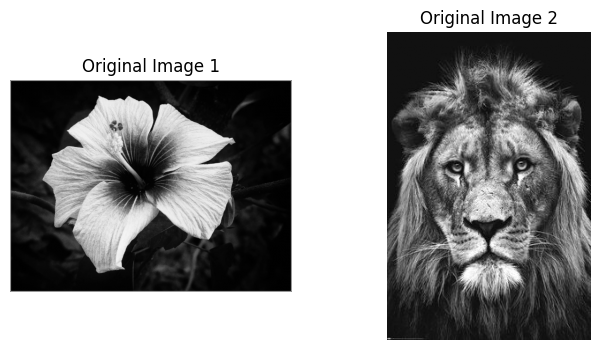

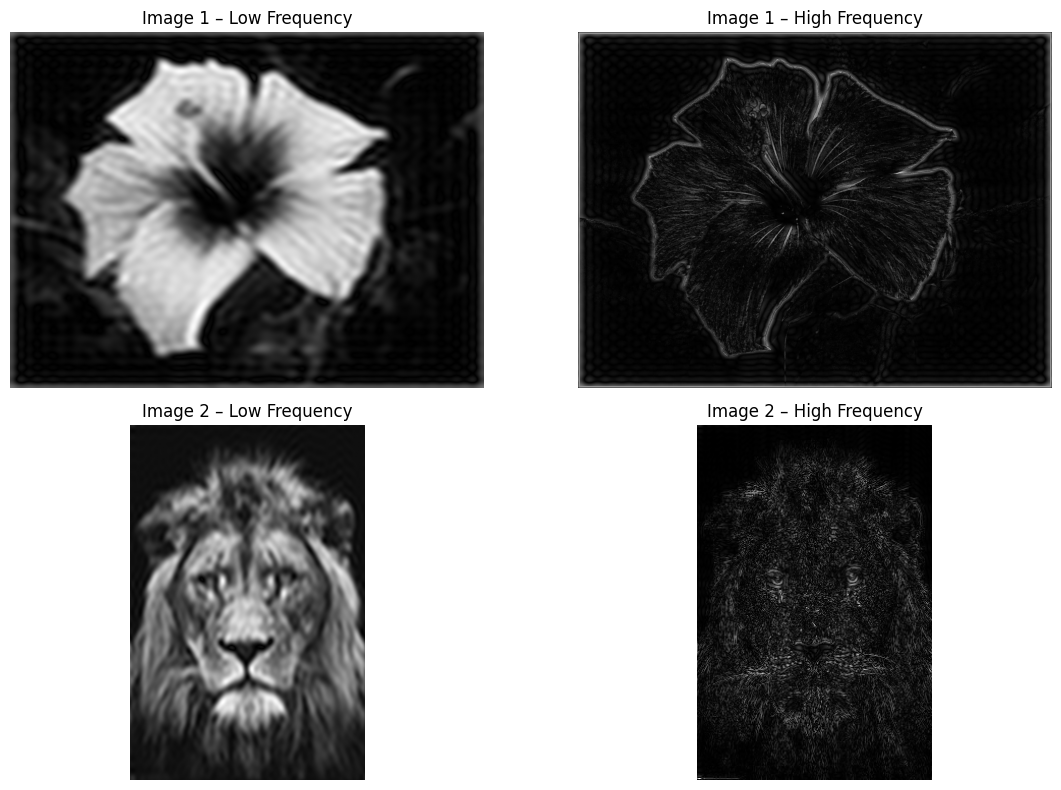

ANALYSIS:
Low-frequency images contain smooth regions and overall structure.
High-frequency images highlight edges and fine details.
Fourier Transform separates spatial information into frequency components.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# ----------------------------------
# 1. Upload TWO images
# ----------------------------------
uploaded = files.upload()
file_names = list(uploaded.keys())

if len(file_names) < 2:
    raise ValueError("Please upload TWO images.")

# Read images safely in grayscale
image1 = cv2.imread(file_names[0], cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(file_names[1], cv2.IMREAD_GRAYSCALE)

if image1 is None or image2 is None:
    raise ValueError("Image could not be read. Please upload valid image files.")

# ----------------------------------
# 2. Display original images
# ----------------------------------
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(image1, cmap='gray')
plt.title("Original Image 1")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image2, cmap='gray')
plt.title("Original Image 2")
plt.axis('off')

plt.show()

# ----------------------------------
# 3. Function: Low & High Frequency Separation
# ----------------------------------
def frequency_separation(img, radius=30):

    # Convert to float for FFT safety
    img = img.astype(np.float32)

    # Fourier Transform
    F = np.fft.fft2(img)
    F_shift = np.fft.fftshift(F)

    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    # Low-pass mask
    low_pass = np.zeros((rows, cols), np.uint8)
    low_pass[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1

    # High-pass mask
    high_pass = 1 - low_pass

    # Apply masks
    low_fft = F_shift * low_pass
    high_fft = F_shift * high_pass

    # Inverse FFT
    low_img = np.abs(np.fft.ifft2(np.fft.ifftshift(low_fft)))
    high_img = np.abs(np.fft.ifft2(np.fft.ifftshift(high_fft)))

    return low_img, high_img

# ----------------------------------
# 4. Apply on both images
# ----------------------------------
low1, high1 = frequency_separation(image1)
low2, high2 = frequency_separation(image2)

# ----------------------------------
# 5. Display results
# ----------------------------------
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(low1, cmap='gray')
plt.title("Image 1 – Low Frequency")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(high1, cmap='gray')
plt.title("Image 1 – High Frequency")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(low2, cmap='gray')
plt.title("Image 2 – Low Frequency")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(high2, cmap='gray')
plt.title("Image 2 – High Frequency")
plt.axis('off')

plt.tight_layout()
plt.show()

# ----------------------------------
# 6. Analysis
# ----------------------------------
print("ANALYSIS:")
print("Low-frequency images contain smooth regions and overall structure.")
print("High-frequency images highlight edges and fine details.")
print("Fourier Transform separates spatial information into frequency components.")